# People Analytics Project

#### Below is a sample People Analytics project for a bank with approximately 7000 employees. 

#### This project focuses on understanding employee turnover and identifying factors influencing retention.

##### By Zacchaeus Akinwale

Tools and Technologies:

- SQL to query data from Snowflake DB
- Python for data modeling and statistical analysis.
- Pandas, NumPy, and scikit-learn for data manipulation
- Matplotlib or Seaborn for data visualization.
- Jupyter Notebooks for documentation and presentation.

Expected Outcomes:

- A comprehensive understanding of turnover patterns.
- Identification of key factors influencing turnover.
- Predictive models for early identification of employees at risk.

In [ ]:
!pip install "snowflake-connector-python[pandas]" seaborn wordcloud pandas

In [147]:
import snowflake.connector  # Import the Snowflake connector

ctx = None
def load_data_from_snowflake():
    global ctx
    ctx = snowflake.connector.connect(
        # credentials removed for suecity purposes
        user="--",
        password="---",
        account="L--",
        warehouse="C--",
        database="S--",
        schema="--"
    )

    sql = "SELECT * FROM EMPLOYEETABLE" 
    emp_data_df = ctx.cursor().execute(sql).fetch_pandas_all()

    return emp_data_df  # Return the DataFrame

# Call the function and store the DataFrame
df = load_data_from_snowflake()

# print(df.head())  # Display the first few rows

# Close the Snowflake connection
ctx.close()
# df


In [148]:
import snowflake.connector
from snowflake.connector.pandas_tools import pd_writer

### Basic E.D.A to understand our Data

In [149]:
df.info()
df.describe()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EMPLOYEEID              7000 non-null   int16  
 1   AGE                     7000 non-null   int8   
 2   GENDER                  7000 non-null   object 
 3   JOBLEVEL                7000 non-null   int8   
 4   DEPARTMENT              7000 non-null   object 
 5   PERFORMANCERATING       7000 non-null   float64
 6   PROMOTIONS              7000 non-null   int8   
 7   SALARY                  7000 non-null   float64
 8   SATISFACTIONSCORE       7000 non-null   float64
 9   WORKLIFEBALANCE         7000 non-null   float64
 10  WORKLOAD                7000 non-null   float64
 11  COMPANYCULTURE          7000 non-null   float64
 12  TRAININGANDDEVELOPMENT  7000 non-null   object 
 13  EDUCATIONALASSISTANCE   7000 non-null   object 
 14  HIREDATE                7000 non-null   

,EMPLOYEEID,AGE,GENDER,JOBLEVEL,DEPARTMENT,PERFORMANCERATING,PROMOTIONS,SALARY,SATISFACTIONSCORE,WORKLIFEBALANCE,...,ECONOMICFACTORS,HISTORICALTURNOVER,EXITINTERVIEWFEEDBACK,STRESSLEVELS,BURNOUTINDICATORS,HEALTHWELLNESSPROGRAMS,COMMUNICATIONCHANNELS,FEEDBACKMECHANISMS,TELECOMMUTINGOPTIONS,INDUSTRYCOMPARISON
0,1,29,Male,5,Marketing,74.066774,4,53910.21322,4.797296,2.178783,...,2.661322,0.589266,Relocation,3.279076,4.223277,Yes,7.886976,5.381754,Yes,2.777397
1,2,43,Male,2,HR,26.452087,0,156757.08590,5.826053,7.838695,...,4.113716,0.045824,Career Advancement,3.717959,1.931164,Yes,3.707010,4.945815,Yes,5.178422
2,3,45,Male,6,HR,68.354767,0,137460.96090,2.540248,6.374761,...,4.528556,0.776000,Relocation,4.340350,2.261812,Yes,4.874186,4.476880,No,6.714549
3,4,42,Male,8,Marketing,45.885185,2,62340.85112,7.704901,5.233864,...,3.480548,0.755782,Personal Issues,3.743643,1.639928,Yes,7.763368,7.174863,No,3.923837
4,5,60,Female,9,Finance,94.243086,5,155315.49110,7.135393,5.221822,...,4.627559,0.263389,Bad Work Culture,2.659678,4.650511,Yes,9.093630,5.089114,No,5.194747


In [150]:
# checking for missing values
df.isnull().sum()

EMPLOYEEID                0
AGE                       0
GENDER                    0
JOBLEVEL                  0
DEPARTMENT                0
PERFORMANCERATING         0
PROMOTIONS                0
SALARY                    0
SATISFACTIONSCORE         0
WORKLIFEBALANCE           0
WORKLOAD                  0
COMPANYCULTURE            0
TRAININGANDDEVELOPMENT    0
EDUCATIONALASSISTANCE     0
HIREDATE                  0
LENGTHOFEMPLOYMENT        0
TEAMDYNAMICS              0
SUPERVISORRELATIONSHIP    0
ABSENTEEISM               0
PUNCTUALITY               0
INDUSTRYTRENDS            0
ECONOMICFACTORS           0
HISTORICALTURNOVER        0
EXITINTERVIEWFEEDBACK     0
STRESSLEVELS              0
BURNOUTINDICATORS         0
HEALTHWELLNESSPROGRAMS    0
COMMUNICATIONCHANNELS     0
FEEDBACKMECHANISMS        0
TELECOMMUTINGOPTIONS      0
INDUSTRYCOMPARISON        0
dtype: int64

In [151]:
print("Column headers:")
df.columns


Column headers:


Index(['EMPLOYEEID', 'AGE', 'GENDER', 'JOBLEVEL', 'DEPARTMENT',
       'PERFORMANCERATING', 'PROMOTIONS', 'SALARY', 'SATISFACTIONSCORE',
       'WORKLIFEBALANCE', 'WORKLOAD', 'COMPANYCULTURE',
       'TRAININGANDDEVELOPMENT', 'EDUCATIONALASSISTANCE', 'HIREDATE',
       'LENGTHOFEMPLOYMENT', 'TEAMDYNAMICS', 'SUPERVISORRELATIONSHIP',
       'ABSENTEEISM', 'PUNCTUALITY', 'INDUSTRYTRENDS', 'ECONOMICFACTORS',
       'HISTORICALTURNOVER', 'EXITINTERVIEWFEEDBACK', 'STRESSLEVELS',
       'BURNOUTINDICATORS', 'HEALTHWELLNESSPROGRAMS', 'COMMUNICATIONCHANNELS',
       'FEEDBACKMECHANISMS', 'TELECOMMUTINGOPTIONS', 'INDUSTRYCOMPARISON'],
      dtype='object')

In [152]:
# df['HIREDATE'] = pd.to_datetime(df['HIREDATE'], format='%Y-%m-%d')

# # Round to the nearest whole year
# df['HIREYEAR'] = df['HIREDATE'].dt.year.round().astype(str)
# df['HIREYEAR']
# # Exclude data for the year 2024
# # df = df[df['HIREYEAR'].dt.year != 2024]

## Turnover Rate Trends

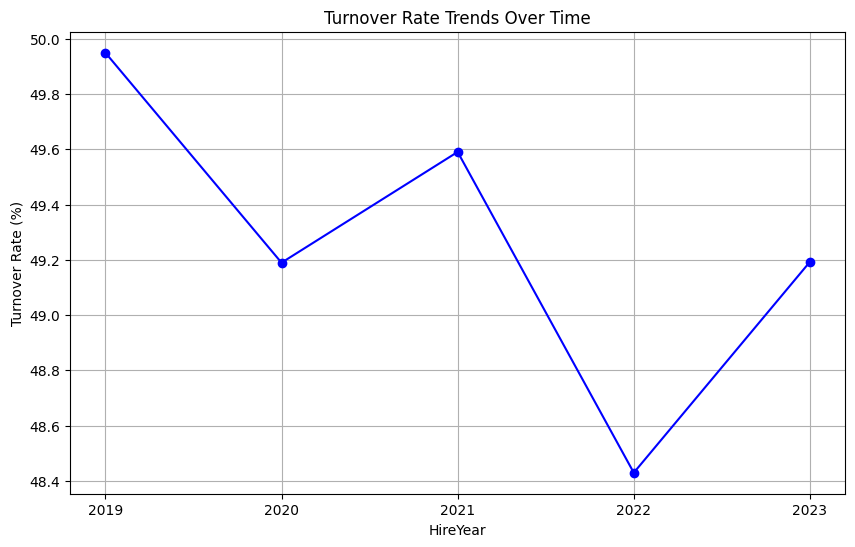

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

df['HIREDATE'] = pd.to_datetime(df['HIREDATE'], format='%Y-%m-%d')
# df['HIRE_DATE'] = pd.to_datetime(df['HIREDATE'])
df['HIREYEAR'] = df['HIREDATE'].dt.year.round().astype(str)
# df['YEAR'] = df['HIRE_DATE'].dt.year
df = df[df['HIREYEAR'] != '2024']

turnover_trends = df.groupby('HIREYEAR')['EMPLOYEEID'].count().reset_index()
turnover_trends.columns = ['Year', 'Total Employees']

# HistoricTurnover column indicating whether an employee left the company (1) or not (0)
turnover_trends['Turnover'] = df.groupby('HIREYEAR')['HISTORICALTURNOVER'].sum().reset_index()['HISTORICALTURNOVER']

turnover_trends['Turnover Rate'] = (turnover_trends['Turnover'] / turnover_trends['Total Employees']) * 100

# Plot turnover rate trends
plt.figure(figsize=(10, 6))
plt.plot(turnover_trends['Year'], turnover_trends['Turnover Rate'], marker='o', linestyle='-', color='b')
plt.title('Turnover Rate Trends Over Time')
plt.xlabel('HireYear')
plt.ylabel('Turnover Rate (%)')
plt.grid(True)
plt.show()


#### Some Contextual Background

Examining the attrition trend within the company over a 5-year period from 2019 to 2023 reveals a noteworthy observation. The year 2019 stands out as having the highest attrition rate among the analyzed years.

Various factors might underlie this trend, prompting the need for a more in-depth investigation through Root Cause Analysis, coupled with correlation analysis, to substantiate any potential null hypotheses.

It's crucial to acknowledge that external factors, particularly macro-economic influences, could have significantly contributed to the elevated attrition rates observed in 2019 and 2021. Notably, the impact of **The Great Resignation**, a global phenomenon pre- and post-COVID, reverberated across the corporate landscape during these periods.

In our analysis, we will delve into factors such as:
- Shifting priorities and reevaluation of work-life balance
- Burnout and job dissatisfaction
- Wage stagnation and inflation

These considerations will be integral to our comprehensive exploration, shedding light on the complex dynamics driving the observed attrition trends.

_
_

### Creating New Columns

In [154]:
# Define the age group categories
age_groups = ['22 - 33', '34 - 42', '43 - 55', '55 and above']

# Create a function to categorize age
def categorize_age(age):
    if 22 <= age <= 33:
        return age_groups[0]
    elif 34 <= age <= 42:
        return age_groups[1]
    elif 43 <= age <= 55:
        return age_groups[2]
    else:
        return age_groups[3]

# Apply the function to create the 'Age_Group' column
df['AGE_GROUP'] = df['AGE'].apply(categorize_age)

# Print the DataFrame with the new column
# df

In [155]:
# Define the JOB LEVEL group categories
job_level_groups = ['Junior Staffs', 'Mid-Level Staffs', 'Seniors Staffs/Managers', 'Directors']

# Create a function to categorize job level
def categorize_level(job_level):
    if  1.0 <= job_level <= 3.0 :
        return job_level_groups[0]
    elif 4.0 <= job_level <= 6.0:
        return job_level_groups[1]
    elif 7.0 <= job_level <= 9.0:
        return job_level_groups[2]
    else:
        return job_level_groups[3]

# Apply the function to create the 'Job_Level_Group' column
df['JOBLEVEL_GROUP'] = df['JOBLEVEL'].apply(categorize_level)

In [156]:
# Define the burnout group categories
burnind = ['I am just ok', 'A bit of stress', 'BurntOut, Need Some Days Off ', 'BurnOut Critical, Need Therapy ', 'Burnout Critical. Need Surgery']

# Create a function to categorize burnout
def categorize_burnout(burnout):
    if 1.0 <= burnout < 2.0:
        return burnind[0]
    elif 2.0 <= burnout < 3.0:
        return burnind[1]
    elif 3.0 <= burnout < 4.0:
        return burnind[2]
    elif 4.0 <= burnout < 5.0:
        return burnind[3]
    else:
        return burnind[4]

# Apply the function to create the 'BURNOUT_INDICATOR_GROUP' column
df['BURNOUT_INDICATOR_GROUP'] = df['BURNOUTINDICATORS'].apply(categorize_burnout)

In [157]:
df['SATISFACTIONSCORE'].describe()

count    4301.000000
mean        5.523849
std         2.647196
min         1.000343
25%         3.227402
50%         5.581784
75%         7.890208
max         9.998653
Name: SATISFACTIONSCORE, dtype: float64

In [158]:
# Define the satisfactionscore group categories
satisgrp = ['very Disatisfied', 'Disatisfied', 'Neutral, Indifferent', 'Satisfied', 'Very Satisfied']

# Create a function to categorize burnout
def categorize_satisfaction(satisfied):
    if 1.0 <= satisfied < 3.0:
        return satisgrp[0]
    elif 3.0 <= satisfied < 5.0:
        return satisgrp[1]
    elif 5.0 <= satisfied < 7.5:
        return satisgrp[2]
    elif 7.5 <= satisfied < 9.0:
        return satisgrp[3]
    else:
        return satisgrp[4]

# Apply the function to create the 'BURNOUT_INDICATOR_GROUP' column
df['SATISFACTIONSCORE_GROUP'] = df['SATISFACTIONSCORE'].apply(categorize_satisfaction)


In [159]:
df['SATISFACTIONSCORE_GROUP'].describe

<bound method NDFrame.describe of 2           very Disatisfied
3                  Satisfied
4       Neutral, Indifferent
5       Neutral, Indifferent
6       Neutral, Indifferent
                ...         
6990             Disatisfied
6991             Disatisfied
6992        very Disatisfied
6995    Neutral, Indifferent
6996    Neutral, Indifferent
Name: SATISFACTIONSCORE_GROUP, Length: 4301, dtype: object>

In [160]:
df['JOBLEVEL_GROUP']

2              Mid-Level Staffs
3       Seniors Staffs/Managers
4       Seniors Staffs/Managers
5                 Junior Staffs
6              Mid-Level Staffs
                 ...           
6990    Seniors Staffs/Managers
6991              Junior Staffs
6992              Junior Staffs
6995    Seniors Staffs/Managers
6996    Seniors Staffs/Managers
Name: JOBLEVEL_GROUP, Length: 4301, dtype: object

## Demographic Analysis

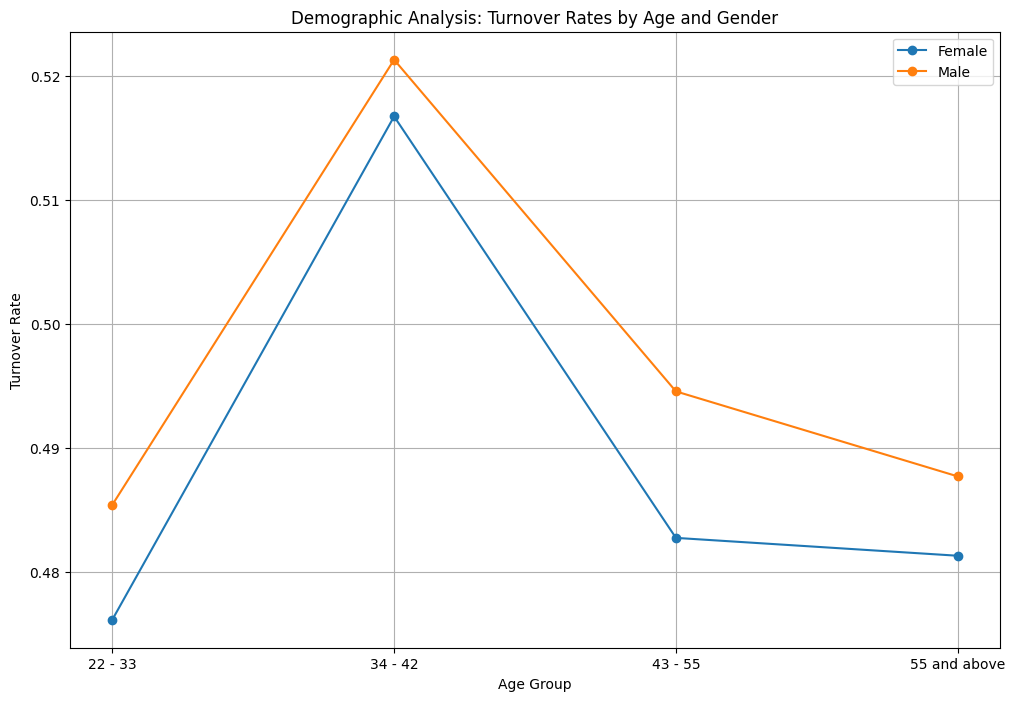

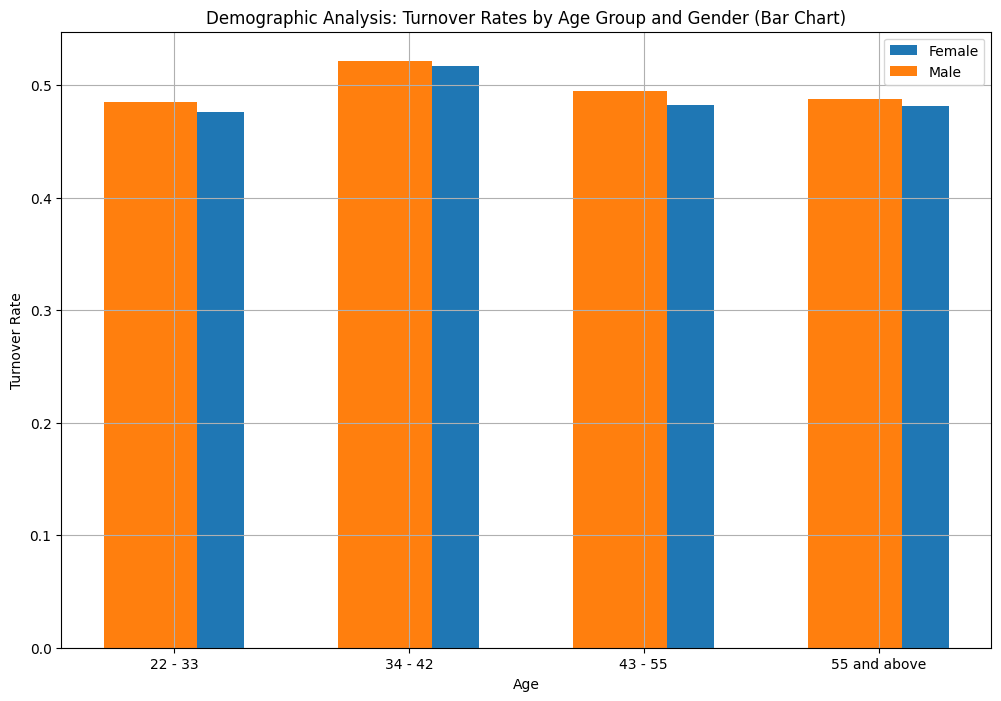

In [179]:

demographic_analysis = df.groupby(['GENDER', 'AGE_GROUP'])['HISTORICALTURNOVER'].mean().reset_index()


barcolors = ['blue', 'orange']
# Plot turnover rates by age and gender
plt.figure(figsize=(12, 8))
for gender in demographic_analysis['GENDER'].unique():
    gender_data = demographic_analysis[demographic_analysis['GENDER'] == gender]
    plt.plot(gender_data['AGE_GROUP'], gender_data['HISTORICALTURNOVER'], marker='o', linestyle='-', label=gender)

plt.title('Demographic Analysis: Turnover Rates by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Turnover Rate')
plt.legend()
plt.grid(True)
plt.show()




# ------------------
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'GENDER' and 'AGE' columns exist in the dataset
demographic_analysis = df.groupby(['GENDER', 'AGE_GROUP'])['HISTORICALTURNOVER'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 8))

# Separate data by gender
male_data = demographic_analysis[demographic_analysis['GENDER'] == 'Male']
female_data = demographic_analysis[demographic_analysis['GENDER'] == 'Female']

# Create bar positions for each age group (assuming unique ages)
x_positions_male = range(len(male_data))
x_positions_female = [p + 0.2 for p in x_positions_male]  # Shift female data slightly right

# Create and plot bars for each gender
plt.bar(x_positions_female, female_data['HISTORICALTURNOVER'], width=0.4, label='Female')
plt.bar(x_positions_male, male_data['HISTORICALTURNOVER'], width=0.4, label='Male')


# Set labels and title
plt.xticks([p + 0.1 for p in x_positions_male], male_data['AGE_GROUP'])  # Use male data for x-axis labels
plt.xlabel('Age')
plt.ylabel('Turnover Rate')
plt.title('Demographic Analysis: Turnover Rates by Age Group and Gender (Bar Chart)')
plt.legend()
plt.grid(True)

plt.show()




__Observing the Evident__

It is evident from the analysis that individuals aged between 34 and 42 exhibit the highest attrition rate compared to other age groups. This trend is notably prominent among male employees. Moving forward, we will delve deeper into our analysis to ascertain whether a similar trend persists among female employees or if there are notable differences.

_


## Departmental Analysis

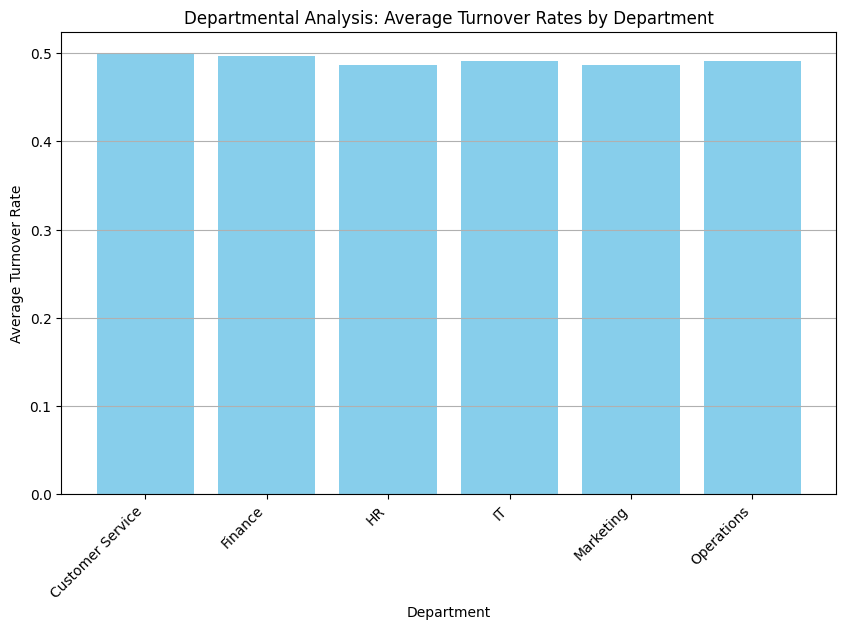

In [163]:

departmental_analysis = df.groupby('DEPARTMENT')['HISTORICALTURNOVER'].mean().reset_index()

# Plot turnover rates by department
plt.figure(figsize=(10, 6))
plt.bar(departmental_analysis['DEPARTMENT'], departmental_analysis['HISTORICALTURNOVER'], color='skyblue')
plt.title('Departmental Analysis: Average Turnover Rates by Department')
plt.xlabel('Department')
plt.ylabel('Average Turnover Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## Correlation Analysis

In [189]:
df['JOBLEVEL_GROUP'].unique()

array(['Mid-Level Staffs', 'Seniors Staffs/Managers', 'Junior Staffs',
       'Directors'], dtype=object)

In [198]:
[group for group in df['JOBLEVEL_GROUP'].unique() if group in ['Junior Staffs', 'Mid-Level Staffs']],
[group for group in df['JOBLEVEL_GROUP'].unique() if group in ['Seniors Staffs/Managers', 'Directors']]

['Seniors Staffs/Managers', 'Directors']

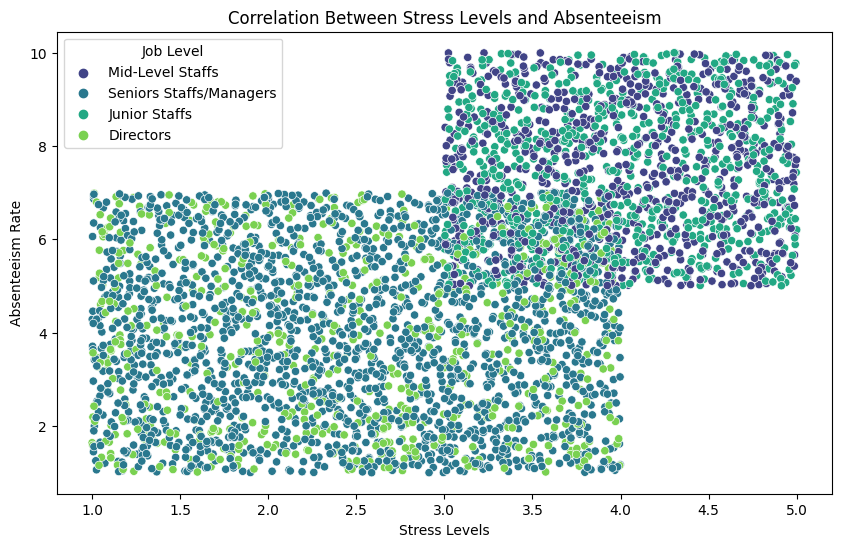

Correlation Coefficient: 0.49725369527162555


In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# If your stress levels are categorical, you may want to convert them to numerical values first

# Assuming 'STRESSLEVELS' and 'ABSENTEEISM' columns exist in your DataFrame

# Convert 'STRESSLEVELS' to numerical values if needed
# df['STRESSLEVELS'] = df['STRESSLEVELS'].astype('category').cat.codes

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='STRESSLEVELS', y='ABSENTEEISM', data=df, hue='JOBLEVEL_GROUP', palette='viridis')
plt.title('Correlation Between Stress Levels and Absenteeism')
plt.xlabel('Stress Levels')
plt.ylabel('Absenteeism Rate')
plt.legend(title='Job Level')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df['STRESSLEVELS'].corr(df['ABSENTEEISM'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Separate data into junior and senior employees
junior_employees = df[df['JOBLEVEL_GROUP'] == 'Junior']
senior_employees = df[df['JOBLEVEL_GROUP'] == 'Senior']

# Compare correlation within each group
correlation_junior = junior_employees['STRESSLEVELS'].corr(junior_employees['ABSENTEEISM'])
correlation_senior = senior_employees['STRESSLEVELS'].corr(senior_employees['ABSENTEEISM'])

# print(f"Correlation for Junior Employees: {correlation_junior}")
# print(f"Correlation for Senior Employees: {correlation_senior}")


In our analysis, it's evident that there's a substantial correlation between high stress levels and absenteeism rates, particularly among Mid-Level and Junior Staff. While it's crucial to note that correlation doesn't imply causation, a discernible trend emerges for these employee categories. The observation suggests that as stress levels increase, so does the rate of absenteeism. The calculated correlation coefficient of 0.49725369527162555 supports the notion of a moderate correlation between these two variables.

_

#### Exit Reasons and Some Root Cause

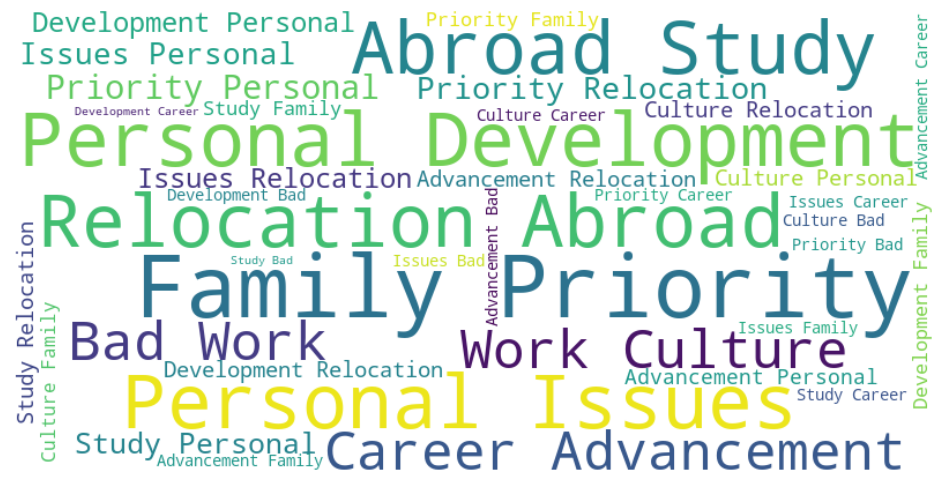

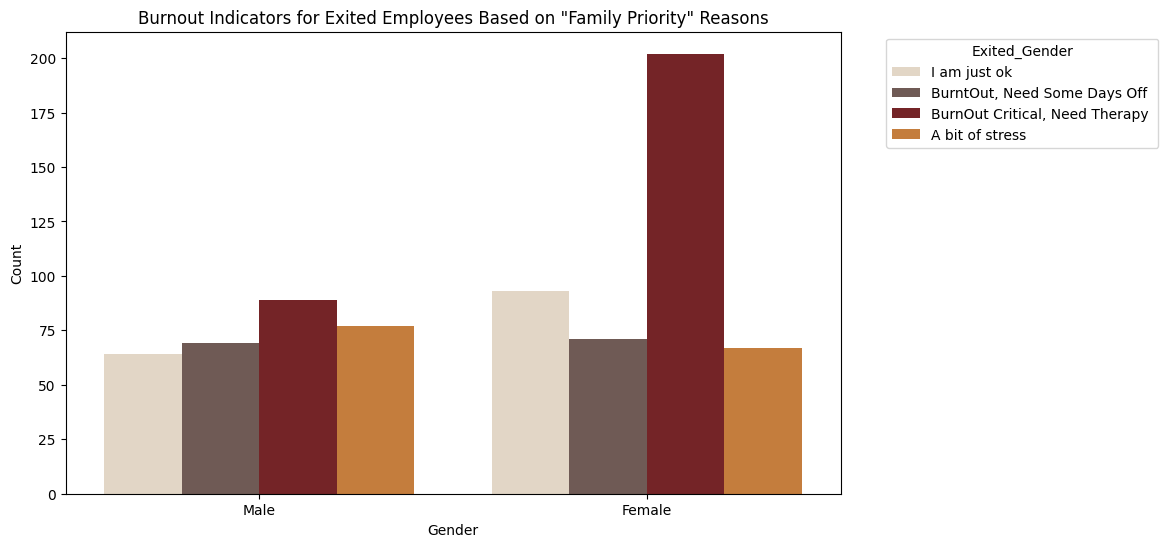

In [170]:
from wordcloud import WordCloud
feedback_text = ' '.join(df['EXITINTERVIEWFEEDBACK'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)

# Display the word cloud
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# Checking the relationship between burnout indicators and exit interview feedback for each gender
exit_feedback_burnout = df[df['EXITINTERVIEWFEEDBACK'] == 'Family Priority'][['GENDER', 'BURNOUT_INDICATOR_GROUP']]
# Plotting burnout indicators for 'Family Priority'
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', hue='BURNOUT_INDICATOR_GROUP', data=exit_feedback_burnout, palette=color_dict)
plt.title('Burnout Indicators for Exited Employees Based on "Family Priority" Reasons')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited_Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### BurnOut Outlook

    Exhaustion: Feeling physically and emotionally drained, unable to meet the demands of the job.
    Cynicism: Developing a negative or detached attitude towards work and colleagues.
    Reduced Accomplishment: Feeling a decreased sense of personal accomplishment and effectiveness in one's work.

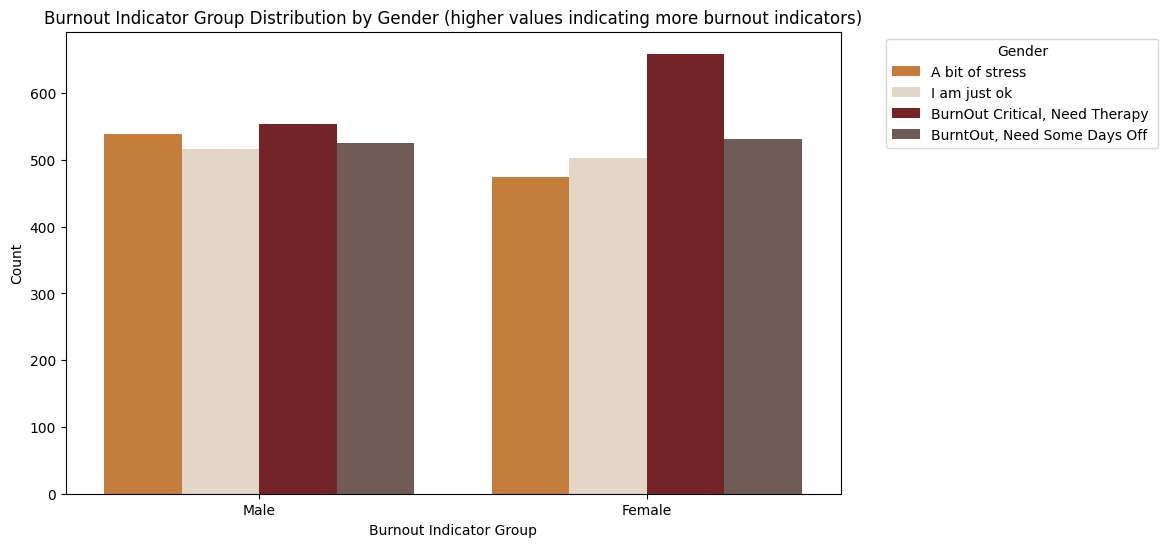

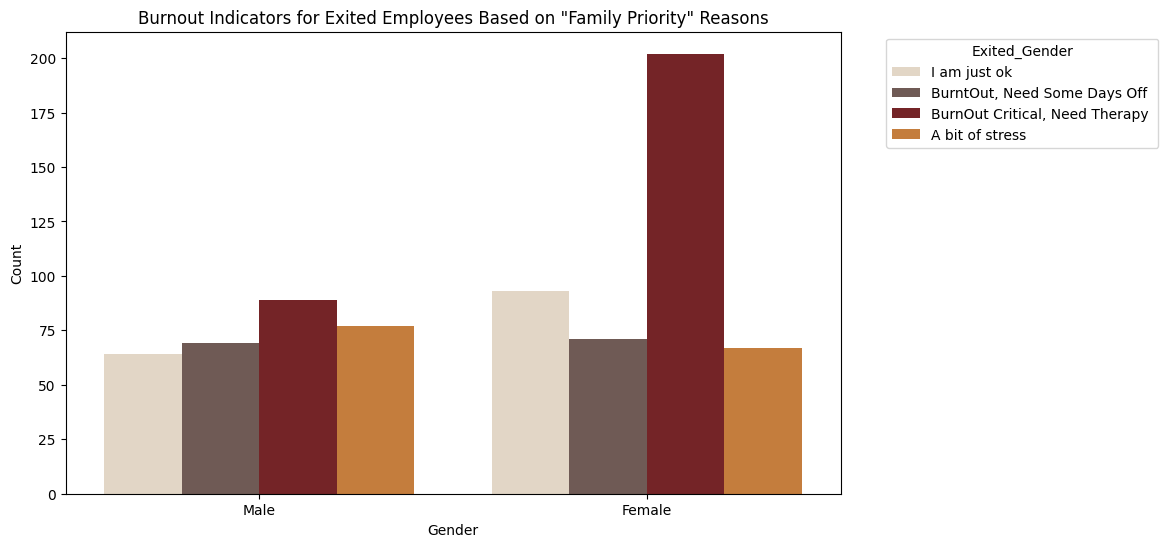

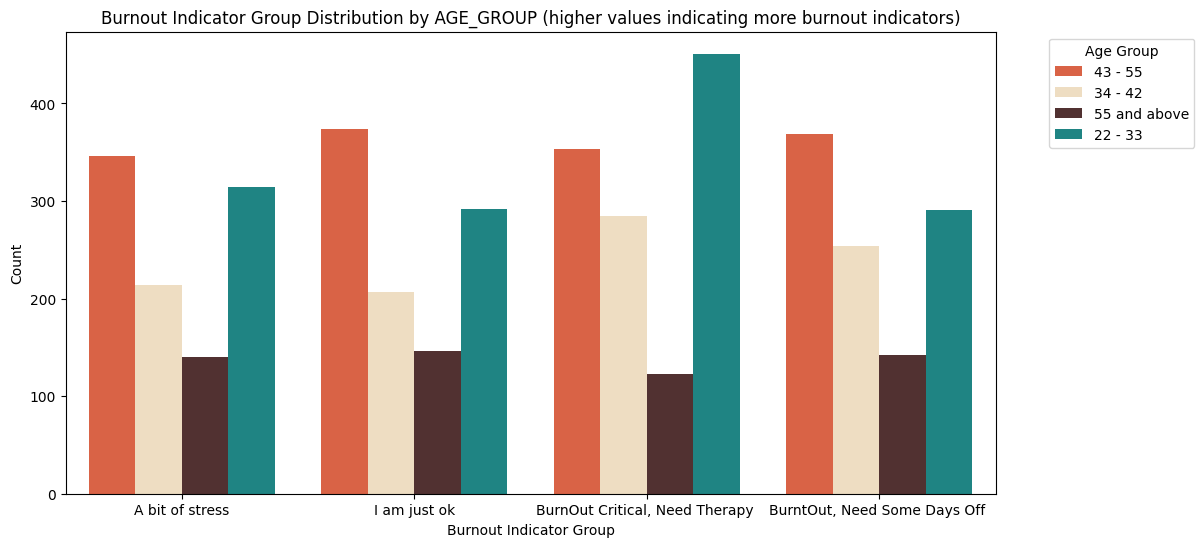

In [202]:
#1 Filter data for gender and burnout indicators
['I am just ok', 'A bit of stress', 'BurntOut, Need Some Days Off ', 'BurnOut Critical, Need Therapy ', 'Burnout Critical. Need Surgery']


gender_burnout_data = df[['GENDER', 'BURNOUT_INDICATOR_GROUP']]

color_dict = {'I am just ok': '#e7d7c1', 'A bit of stress': '#db7c26', 'BurntOut, Need Some Days Off ': '#735751', 'BurnOut Critical, Need Therapy ': '#81171b', 'Burnout Critical. Need Surgery': '#220901'}
# Plotting a stacked bar chart for burnout by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', hue='BURNOUT_INDICATOR_GROUP', data=gender_burnout_data, palette=color_dict)
plt.title('Burnout Indicator Group Distribution by Gender (higher values indicating more burnout indicators)')
plt.xlabel('Burnout Indicator Group')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 2
# Checking the relationship between burnout indicators and exit interview feedback for each gender
exit_feedback_burnout = df[df['EXITINTERVIEWFEEDBACK'] == 'Family Priority'][['GENDER', 'BURNOUT_INDICATOR_GROUP']]
# Plotting burnout indicators for 'Family Priority'
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', hue='BURNOUT_INDICATOR_GROUP', data=exit_feedback_burnout, palette=color_dict)
plt.title('Burnout Indicators for Exited Employees Based on "Family Priority" Reasons')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited_Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# 3
age_groups_burnout_data = df[['AGE_GROUP', 'BURNOUT_INDICATOR_GROUP']]
age_color_dict = {'22 - 33': '#0E9594', '34 - 42': '#F5DFBB', '43 - 55': '#F2542D', '55 and above': '#562C2C'}
# # Plotting a stacked bar chart for burnout by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='BURNOUT_INDICATOR_GROUP', hue='AGE_GROUP', data=age_groups_burnout_data, palette=age_color_dict)
plt.title('Burnout Indicator Group Distribution by AGE_GROUP (higher values indicating more burnout indicators)')
plt.xlabel('Burnout Indicator Group')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# # 4
# joblevel_groups_burnout_data = df[['JOBLEVEL_GROUP', 'BURNOUT_INDICATOR_GROUP']]
# # Define a color dictionary
# level_color_dict = {'Junior Staffs': '#0E9594', 'Mid-Level Staffs': '#F5DFBB', 'Seniors Staffs/Managers': '#F2542D', 'Directors': '#562C2C'}
# # Plotting a stacked bar chart for burnout by gender
# plt.figure(figsize=(12, 6))
# sns.countplot(x='BURNOUT_INDICATOR_GROUP', hue='JOBLEVEL_GROUP', data=joblevel_groups_burnout_data, palette= level_color_dict)
# plt.title('Distribution of Burnout Indicators by Job Level Group')
# plt.xlabel('BURNOUT_INDICATOR_GROUP')
# plt.ylabel('Count')
# plt.legend(title='Job Level Group', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

# Grouping data by gender and calculating the mean and standard deviation
# gender_avg_burnout = df.groupby('GENDER')['BURNOUTINDICATORS'].mean()
# gender_std_burnout = df.groupby('GENDER')['BURNOUTINDICATORS'].std()

# # Plotting a bar chart with error bars
# plt.figure(figsize=(10, 6))
# sns.barplot(x=gender_avg_burnout.index, y=gender_avg_burnout, yerr=gender_std_burnout, capsize=10)
# plt.title('Average Burnout by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Average Burnout')
# plt.show()



Upon examining the distribution of burnout reasons across genders, a notable trend emerges. Female employees appear to experience higher levels of burnout compared to their male counterparts.

Analyzing the qualitative data obtained from exit interviews, a WordCloud visualization highlights "FamilyPriority" as the most prevalent reason for employee exits. Intriguingly, delving into the reasons for exit, specifically Family Priorities (as indicated by the dominant term in the WordCloud), reveals a significant uptick in female employees exiting due to critical-stage burnout.

This observation suggests that some female employees may be encountering burnout, potentially not solely work-related, leading to exits driven by family priorities after enduring a period of intense burnout. This prompts the question of whether there might be an insufficient work-life balance for this particular gender group.

Shifting the focus to burnout distribution based on age groups uncovers additional insights. The 22-33 age group stands out with the highest frequency of critical burnout instances, indicating a potential need for therapeutic interventions. This finding aligns with the observed higher attrition rates in this age group, emphasizing the correlation between burnout levels and employee attrition trends across different age groups.

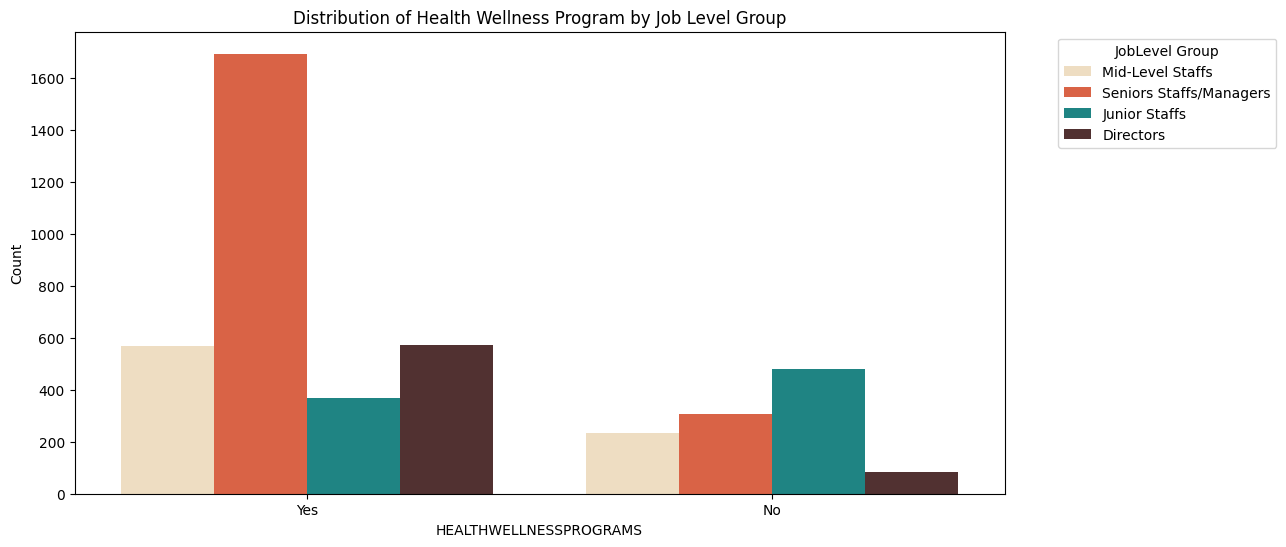

Chi-squared value: 599.5715057804514, p-value: 1.2482019552792418e-129


JOBLEVEL_GROUP,Directors,Junior Staffs,Mid-Level Staffs,Seniors Staffs/Managers
HEALTHWELLNESSPROGRAMS,,,,
No,0.075455,0.436364,0.210909,0.277273
Yes,0.178382,0.115589,0.177445,0.528585


In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Extract relevant columns for analysis
analysis_df = df[['JOBLEVEL_GROUP', 'HEALTHWELLNESSPROGRAMS', 'BURNOUT_INDICATOR_GROUP']]

# Filter data for junior and senior employees
junior_df = analysis_df[analysis_df['JOBLEVEL_GROUP'] == 'Junior']
senior_df = analysis_df[analysis_df['JOBLEVEL_GROUP'] == 'Senior']

level_color_dict = {'Junior Staffs': '#0E9594', 'Mid-Level Staffs': '#F5DFBB', 'Seniors Staffs/Managers': '#F2542D', 'Directors': '#562C2C'}

plt.figure(figsize=(12, 6))
sns.countplot(x='HEALTHWELLNESSPROGRAMS', data=analysis_df, hue='JOBLEVEL_GROUP', palette=level_color_dict)
plt.title('Distribution of Health Wellness Program by Job Level Group')
plt.xlabel('HEALTHWELLNESSPROGRAMS')
plt.ylabel('Count')
plt.legend(title='JobLevel Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Plot the distribution of Health Wellness Program
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.countplot(x='HEALTHWELLNESSPROGRAMS', data=analysis_df, hue='JOBLEVEL_GROUP')
# plt.title('Distribution of Health Wellness Program by Job Level Group')

# plt.show()



# ------------

from scipy.stats import chi2_contingency

# Create a contingency table for Health Wellness Program and Job Level
contingency_table = pd.crosstab(analysis_df['HEALTHWELLNESSPROGRAMS'], analysis_df['JOBLEVEL_GROUP'])

# Perform a chi-squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared value: {chi2}, p-value: {p}')



# Calculate proportions
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
# print(proportions)

proportions


Interpretation:

    The high chi-squared value suggests a significant difference between the observed and expected frequencies in the contingency table, indicating an association between Health Wellness Program and Job Level.
    The very low p-value (close to zero) supports the rejection of the null hypothesis of independence. It suggests that the association observed is not likely due to random chance, indicating a statistically significant relationship.

In practical terms, this result indicates that there is a statistically significant association between the Health Wellness Program and Job Level variables. The association could be due to junior and senior employees having different levels of participation in the health wellness program. Further analysis or post-hoc tests may be conducted to explore the nature of this association and identify specific patterns or differences.

### Absenteeism Outlook

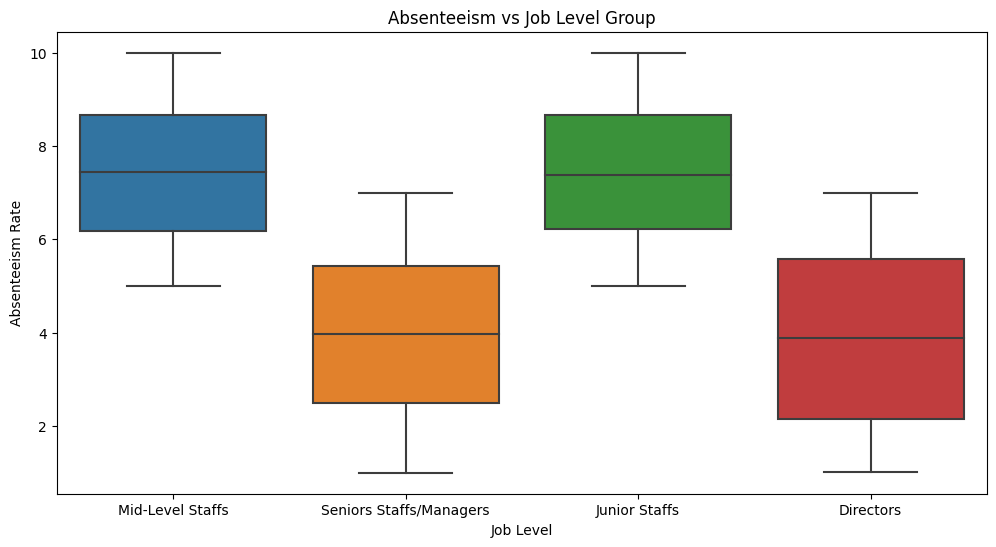

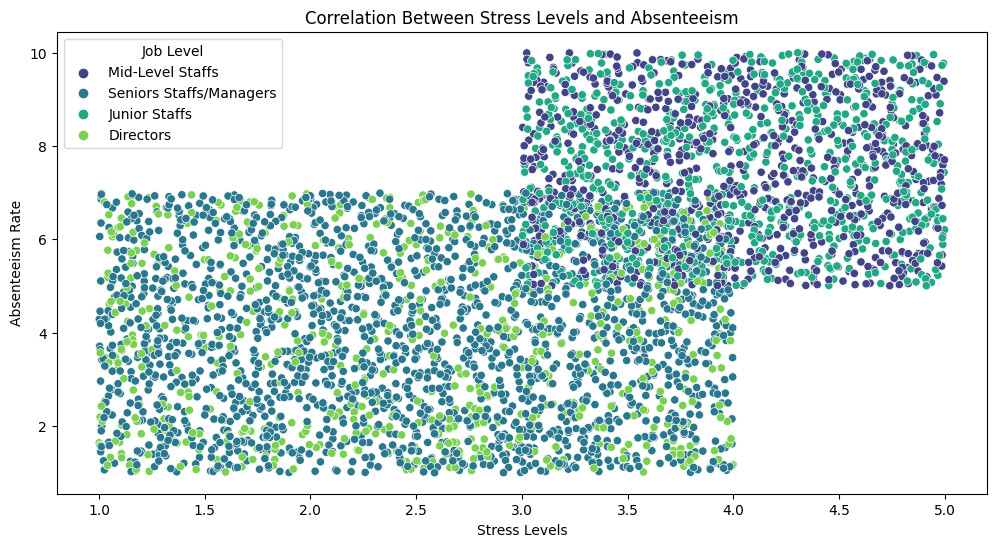

Correlation Coefficient: 0.49725369527162555


In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Create a subset for analysis
_df = df[['JOBLEVEL_GROUP', 'ABSENTEEISM', 'STRESSLEVELS']]

# Plotting the relationship between Job Level and Absenteeism
plt.figure(figsize=(12, 6))
sns.boxplot(x='JOBLEVEL_GROUP', y='ABSENTEEISM', data=_df)
plt.title('Absenteeism vs Job Level Group')
plt.xlabel('Job Level')
plt.ylabel('Absenteeism Rate')
plt.show()



plt.figure(figsize=(12, 6))
sns.scatterplot(x='STRESSLEVELS', y='ABSENTEEISM', data=df, hue='JOBLEVEL_GROUP', palette='viridis')
plt.title('Correlation Between Stress Levels and Absenteeism')
plt.xlabel('Stress Levels')
plt.ylabel('Absenteeism Rate')
plt.legend(title='Job Level')
plt.show()
# Calculate the correlation coefficient
correlation_coefficient = df['STRESSLEVELS'].corr(df['ABSENTEEISM'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Separate data into junior and senior employees
junior_employees = df[df['JOBLEVEL_GROUP'] == 'Junior']
senior_employees = df[df['JOBLEVEL_GROUP'] == 'Senior']

# Compare correlation within each group
correlation_junior = junior_employees['STRESSLEVELS'].corr(junior_employees['ABSENTEEISM'])
correlation_senior = senior_employees['STRESSLEVELS'].corr(senior_employees['ABSENTEEISM'])

# print(f"Correlation for Junior Employees: {correlation_junior}")
# print(f"Correlation for Senior Employees: {correlation_senior}")


In our analysis, we observe a notable pattern: Junior and Mid-level employees tend to exhibit a higher absenteeism rate in comparison to Senior Employees and Directors.

Upon conducting more in-depth comparisons to unravel the reasons behind this trend, we have gained a clearer understanding. It appears that Junior and Mid-level employees experience elevated stress levels, which, in turn, contribute to the higher rates of absenteeism when contrasted with their Senior counterparts and Directors.

In [169]:
# Assuming df is your DataFrame containing the fabricated data

# Filter employees with exit feedback as 'Family Priority'
family_priority_employees = df[df['EXITINTERVIEWFEEDBACK'] == 'Family Priority']

# Display the result
# family_priority_employees


### Employee Satisfaction Analysis

Text(0, 0.5, 'Count of Employees')

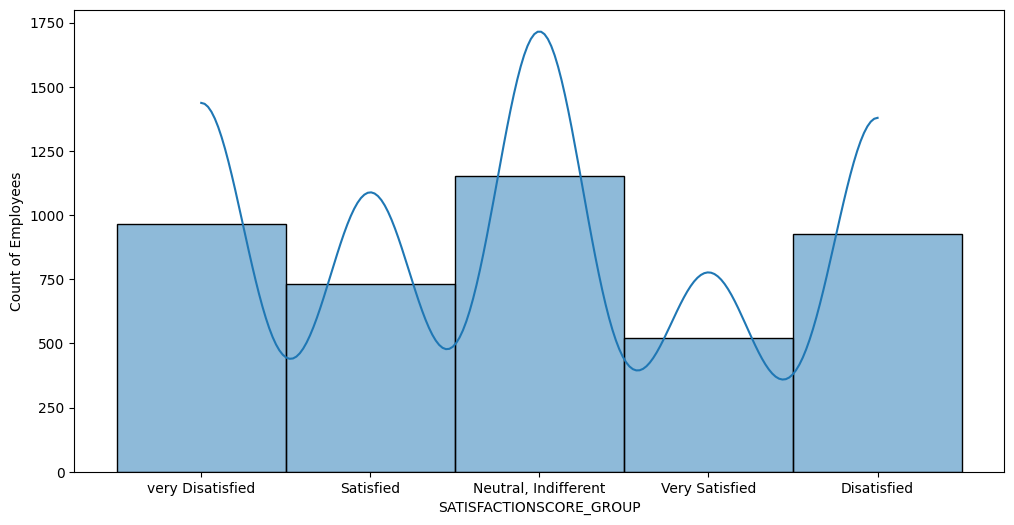

In [171]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['SATISFACTIONSCORE_GROUP'], bins=10, kde=True)
plt.ylabel('Count of Employees')



In our analysis, it becomes evident that the overall satisfaction trend among employees in the company leans towards a more negative outlook rather than positive. This highlights a critical need for the organization to enhance its Employee Net Promoter Score (eNPS) by implementing policies aimed at mitigating burnouts, reducing absenteeism, and alleviating stress levels.

To address gender-specific concerns, it is imperative to acknowledge that females, particularly those with family priorities, constitute a significant portion of individuals exiting the company due to critical burnout stages. This raises the question of whether the workplace environment is sufficiently accommodating to women, especially married individuals who may bear responsibilities such as caring for their children and managing household affairs.

Considering these findings, the company may explore the implementation of special packages and programs tailored to the unique needs of female employees. Creating initiatives that specifically address challenges faced by women, such as those connected to family priorities, can contribute to a more inclusive and supportive workplace. 


Additionally, contemplating the introduction of special packages for pregnant women and mothers within the workplace could be a proactive measure to ensure a conducive and supportive environment during these life stages. This strategic approach aligns with the goal of fostering a workplace culture that caters to the diverse needs of its employees, ultimately enhancing overall satisfaction and retention.